## Copyright Note


**This lecture mainly examples are adapted from wiki and internet resources. Also, most of figures are from Reference 1--chapter 5** 

## Deep Learning Reference 1

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Deep Learning with Python by Francois Chollet (2018)**[relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

## Deep Learning Reference 2
**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron  (Author)**[ relative links](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)





## Learning concepts:

1.Convolution Operator

 ## Convolution Operator


**Convolution:** In mathematics (and, in particular, functional analysis) convolution is a mathematical operator on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other. 

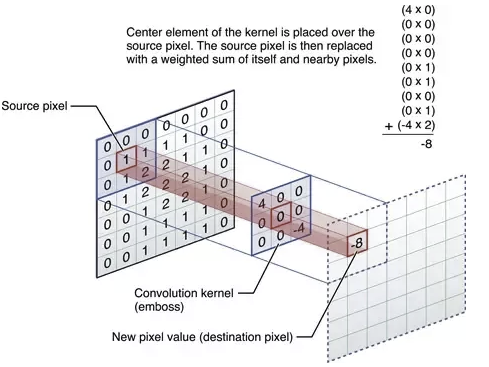

**The convolution filter has an input user (i.e., filter size). The filter content is learnt from network.**

# Pading

**It is the process that consists of adding an approperiate number of rows and columns of each side of the input feature map so as to make it possible to fit center convolution windows around every input tile** 

## Example

**Given that the input is 5x5 matrix, we need to extract 25 3x3 patches: However in the following figure, we could not extract more than 9.**

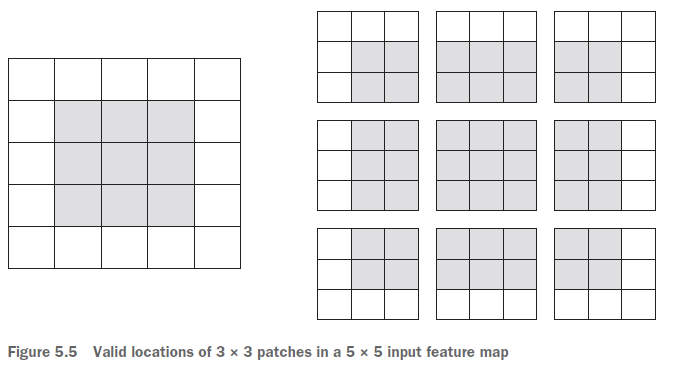

## Solution

Pad the figure with numbers for each edge (when needed)

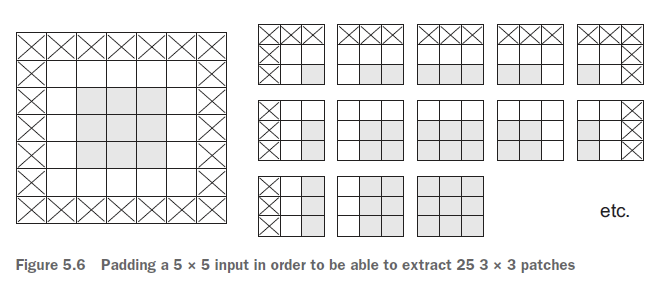

# Stride

**It is a parameter of the convolution equals the distance between two successive windows; the default stride = 1**   

## Example

**Given that the input is 5x5 matrix, we have a 3x3 convolution with stride=2**

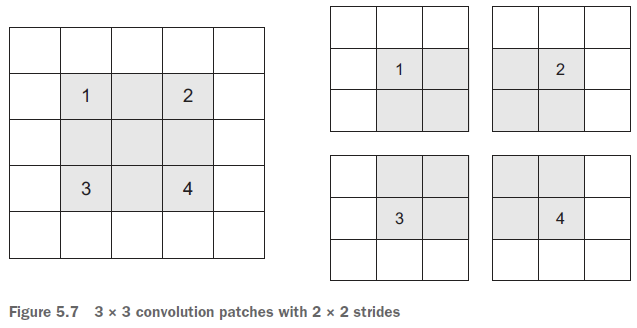

## Pooling

**Pooling** is a form of non-linear down-sampling. There are several non-linear functions to implement pooling among which max pooling is the most common. 

**Max-pool**: It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum. 
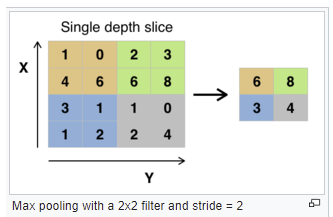

# Stride and pading cocepts and calculations 


[article](https://arxiv.org/pdf/1603.07285.pdf)

[Its github](https://github.com/vdumoulin/conv_arithmetic)



# The whole calculation illustrations and visualization 

[Visual example](http://cs231n.github.io/convolutional-networks/#conv)

In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Fashion-MNIST database of fashion articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

Label	          Description       
0	T-shirt/top      
1	Trouser     
2	Pullover    
3	Dress     
4	Coat    
5	Sandal  
6	Shirt   
7	Sneaker    
8	Bag     
9	Ankle boot  

In [ ]:
#Load the data


from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [ ]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

## [layers.Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)

## [dilated convolution](https://erogol.com/dilated-convolution/#:~:text=In%20simple%20terms%2C%20dilated%20convolution,4%20means%20skipping%203%20pixels.)

It uses the same filter size but increase receptive field or to encode long range contextual information.

In [ ]:
help(layers.Conv2D)

To calculate the learnable parameters in Conv2D, all we have to do is just multiply the by the shape of width m, height n, previous layer’s filters d and account for all such filters k in the current layer. Don’t forget the bias term for each of the filter. Number of parameters in a CONV layer would be : ((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows: ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters). Where the term “filter” refer to the number of filters in the current layer.[link](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

In [ ]:
# Filters 32 and 64 and relu.. 3 layers

# Feature extraction using Conv2D
fashion_model = models.Sequential()
fashion_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classification using fully-connected NN
fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(64, activation='relu'))        
fashion_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion_model.summary()

In [ ]:
#What is -1 refers in the reshape

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model_train = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
import matplotlib.pyplot as plt
accuracy = fashion_model_train.history["accuracy"]
val_accuracy = fashion_model_train.history["val_accuracy"]
loss = fashion_model_train.history['loss']
val_loss = fashion_model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()